In [2]:
###### Install packages
import pandas as pd
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [19]:
data = pd.concat([pd.read_csv(dt,index_col=['Date'], parse_dates=['Date']) for dt in glob.glob("../data/*")])
data.shape

(31088, 18)

In [21]:
data_analysis = data[["Titre","Cours_Ouv","Cours_Clot"]]
data_analysis = data_analysis[data_analysis["Cours_Ouv"]!="NC"]
data_analysis = data_analysis[data_analysis["Cours_Clot"]!="NC"]
data_analysis.head()

,Titre,Cours_Ouv,Cours_Clot
Date,,,
2016-08-09,FILTISAC CI,27 400,27 400
2016-08-09,NESTLE CI,61 000,61 000
2016-08-09,AIR LIQUIDE CI,19 450,19 450
2016-08-09,SMB CI,30 005,30 005
2016-08-09,SITAB CI,152 005,152 005


In [22]:
def modif(x):
    return int("".join(x.split(" ")))

data_analysis["Cours_Ouv"] = data_analysis["Cours_Ouv"].map(modif)
data_analysis["Cours_Clot"] = data_analysis["Cours_Clot"].map(modif)
data_analysis["Variation"] = (data_analysis["Cours_Clot"]-data_analysis["Cours_Ouv"])/data_analysis["Cours_Ouv"]

data_analysis.head()

,Titre,Cours_Ouv,Cours_Clot,Variation
Date,,,,
2016-08-09,FILTISAC CI,27400,27400,0.0
2016-08-09,NESTLE CI,61000,61000,0.0
2016-08-09,AIR LIQUIDE CI,19450,19450,0.0
2016-08-09,SMB CI,30005,30005,0.0
2016-08-09,SITAB CI,152005,152005,0.0


In [25]:
## Nombre de titres
print("Nombre de titres: ",len(list(set(data_analysis["Titre"]))))

Nombre de titres:  45


## SERIES TEMPORAL PREDICTION ##

In [23]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

%matplotlib inline

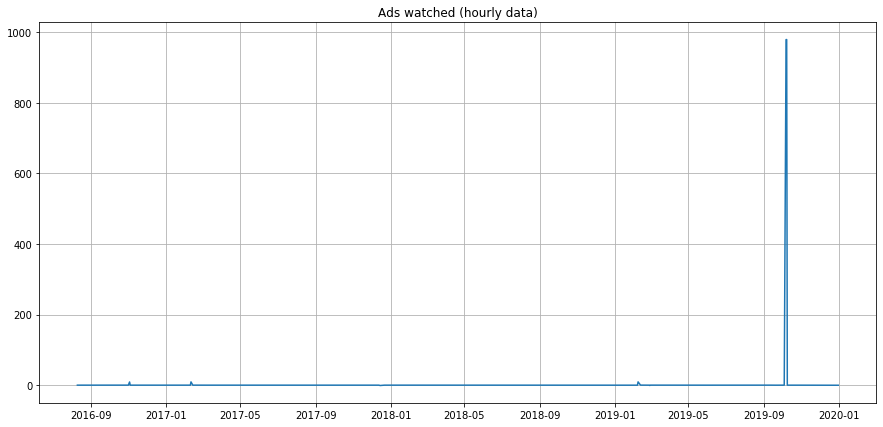

In [24]:
plt.figure(figsize=(15, 7))
plt.plot(data_analysis[data_analysis["Titre"]=="FILTISAC CI"]["Variation"])
plt.title('Ads watched (hourly data)')
plt.grid(True)
plt.show()

In [ ]:
ads = pd.read_csv('../input/ads.csv', index_col=['Time'], parse_dates=['Time'])

In [5]:
#data = pd.read_csv("/Users/ladpice/Desktop/SENIOR_DATASCIENTIST/Financial-Stock-Prediction/data/StockData_part1.csv")
data = pd.read_csv("../data/StockData_part1.csv")
data.head(5)

,Date,Symbole,Titre,Cotation_Volume,Cotation_Valeur,Cours_Precedent,Cours_Ouv,Cours_Clot,Cours_Moy,Variation,Variation_Ann_Prec,Cours_Reference,Ecarts_Maximaux_Bas,Ecarts_Maximaux_Haut,Dernier_Dividende_Montant_Net,Dernier_Dividende_Date,Comp,Rdt_Net,PER
0,2016-08-09,CABC,SICABLE CI,NaN,NaN,109 000,NC,NC,NC,NaN,"-11,74%",109 000,100 825,117 175,"1 200,00",28/07/2016,1er,"1,10%","23,01"
1,2016-08-09,FTSC,FILTISAC CI,12,328 800,29 500,27 400,27 400,27 400,"-7,12%","-8,65%",27 400,25 345,29 455,"1 045,00",30/06/2016,1er,"3,81%","24,59"
2,2016-08-09,NEIC,NEI-CEDA CI,NaN,NaN,3 455,NC,NC,NC,NaN,"-17,74%",3 455,3 200,3 710,"9,00",12/08/2011,1er,"0,00%","0,00"
3,2016-08-09,NTLC,NESTLE CI,10,610 000,61 000,61 000,61 000,61 000,"0,00%","22,00%",61 000,56 425,65 575,"31,50",29/09/2011,2eme,"0,00%","21,47"
4,2016-08-09,SEMC,CROWN SIEM CI,NaN,NaN,51 000,NC,NC,NC,NaN,"13,35%",51 000,47 175,54 825,"1 215,00",28/08/2015,2eme,-,"40,94"


In [6]:
data_analysis = data[["Date","Symbole","Titre","Cours_Ouv","Cours_Clot"]]
print("Number of product stocks: ",len(set(data_analysis["Titre"])))

Number of product stocks:  39


In [ ]:
def plot_series(dataframe: pd.DataFrame, col_name: str = None, title: str = "") -> None:
    """To make it uniform in all the analysis."""
    fig, ax = plt.subplots(figsize = (12, 8))
    ax.set_title(title)
    plt.ylabel("# of Deaths", fontsize=16)
    if col_name is not None:
        len_col = len(dataframe[col_name])
        series = dataframe[col_name]
    else:
        len_col = len(dataframe)
        series = deepcopy(dataframe)
    series.plot(linewidth=1.5, color="#FF6F26")
    plt.xlabel("", fontsize=18)
    plt.fill_between(series.index,
                     series.values,
                     0,
                     color="#FF6F26",
                     alpha=0.35)